<a href="https://colab.research.google.com/github/MatinMashhadiabbsiprogramming/Google_Colab/blob/main/Dve_Medel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# read data for pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

housing = pd.read_csv('/content/drive/MyDrive/Colab_Files/DataSet/housing.csv',sep=',')
# housing.info()
housing.columns # return head table
# housing['name table'].unique() # return detil of table /
# filter table
# housing[housing['']==[]]
# housing['population'][housing['ocean_proximity']=='ISLAND']

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [2]:
# tiran & a test
Train_data_model,Test_data_model = train_test_split(housing,test_size=0.2,random_state=42)


<Axes: xlabel='longitude', ylabel='latitude'>

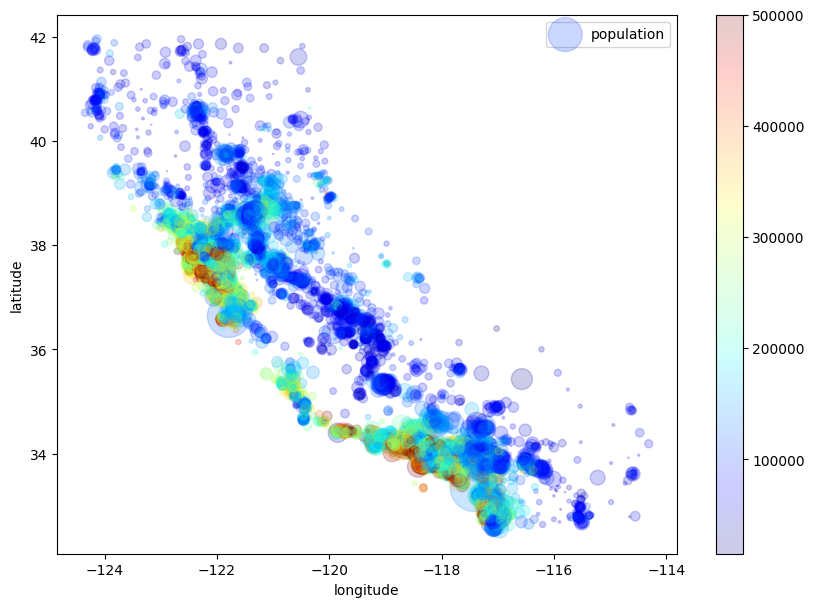

In [3]:
data=Train_data_model.copy()
data.plot(kind="scatter",x="longitude",y="latitude",
          s=data["population"]/30,label="population",
          c=data["median_house_value"],cmap=plt.get_cmap("jet"),
          figsize=(10,7),alpha=0.2)


In [4]:
data.drop('ocean_proximity', axis=1, inplace=True)

In [5]:
# standard correlation coefficient
corr_matrix=data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.690647
total_rooms,0.133989
housing_median_age,0.103706
households,0.063714
total_bedrooms,0.047980
population,-0.026032
longitude,-0.046349
latitude,-0.142983


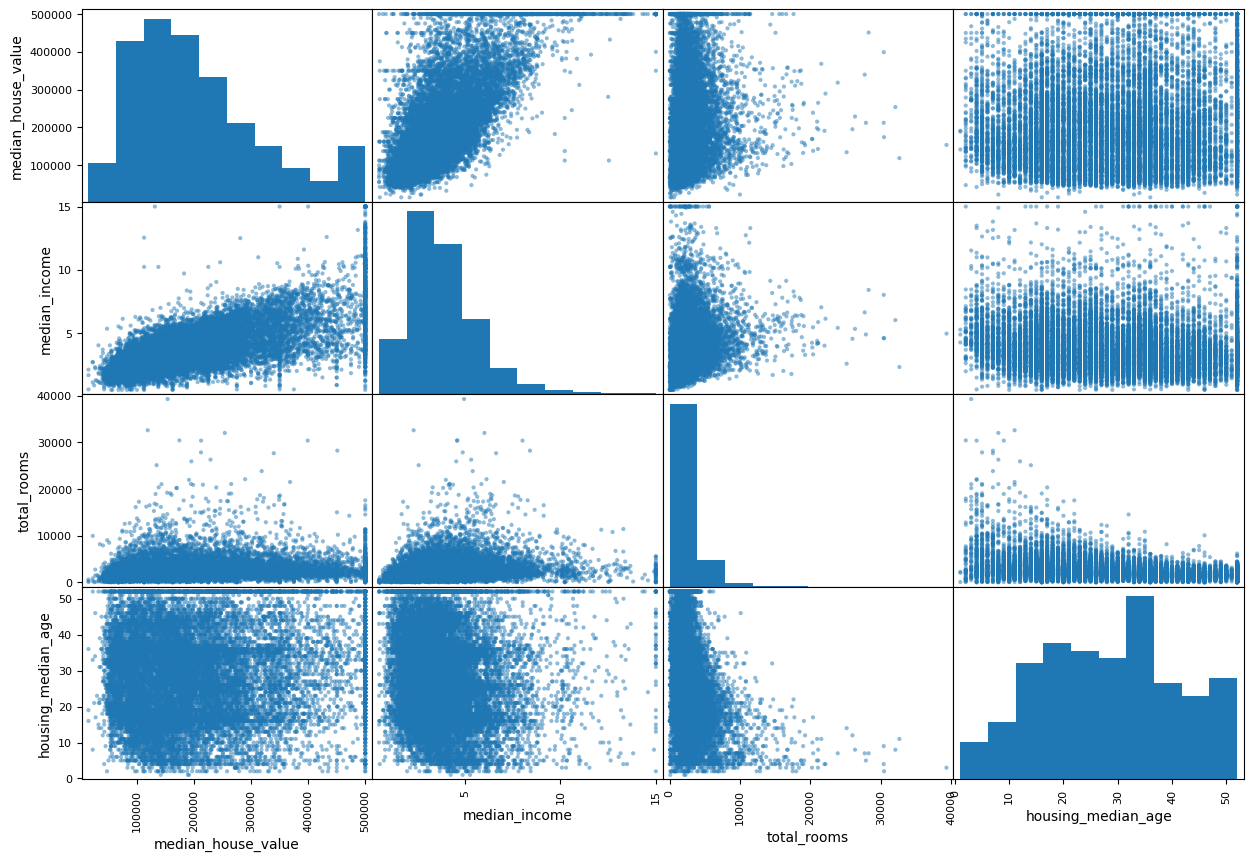

In [6]:
features = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(data[features],figsize=(15,10))
plt.show()

In [7]:
data['total_rooms_per_households'] = data['total_rooms']/data['households']
data['total_bedrooms_per_tutal_rooms'] = data['total_bedrooms']/data['households']
data['population_per_households'] = data['population']/data['households']
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_households,total_bedrooms_per_tutal_rooms,population_per_households
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,5.017657,1.006421,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,4.473545,1.041005,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,5.645833,0.985119,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,4.002817,1.033803,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,6.268421,1.134211,2.300000


In [8]:
# data['ocean_proximity'].delet()
data.drop('ocean_proximity', axis=1, inplace=True)
data.head()

KeyError: "['ocean_proximity'] not found in axis"

In [ ]:
corr_matrix=data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

## Perpare data

In [ ]:
# deleted columns median_house_value
df=Train_data_model.copy()
df_label=df['median_house_value'].copy()
df=df.drop('median_house_value',axis=1)

In [ ]:
# missing values is ok
df_num = df.drop('ocean_proximity',axis=1)
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df_num)
X = imputer.transform(df_num)
df_num_impute_tr = pd.DataFrame(X,columns=df_num.columns)
df_num_impute_tr.info()
df_num.info()

In [ ]:
# Custom transformers
rooms_ix,bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombindAttributesAdder():
  pass